# Kaggle - Titanic: Machine Learning from Disaster

In [3]:
import pandas as pd

## Load Dataset 데이터 불러오기

In [4]:
train = pd.read_csv("data/train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test = pd.read_csv("data/test.csv")

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explore 탐색

In [8]:
# 시각화 페키지 불러오기
import seaborn as sns

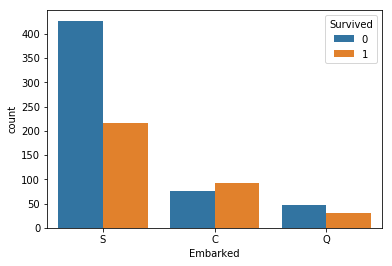

In [10]:
# 선착장과 생존의 관계 확인
sns.countplot(data=train, x="Embarked", hue="Survived")

#### 선착장에 따른 생존률이 다름을 확인 할 수 있음

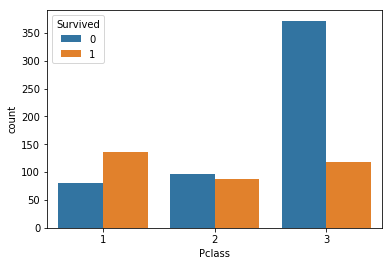

In [11]:
# 좌석 등급과 생존의 관계 확인
sns.countplot(data=train, x="Pclass", hue="Survived")

#### 좌석 등급이 높을 수록 생존률이 높음

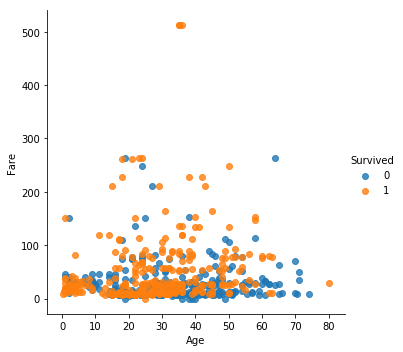

In [21]:
# 나이와 요금에 따른 생존률
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

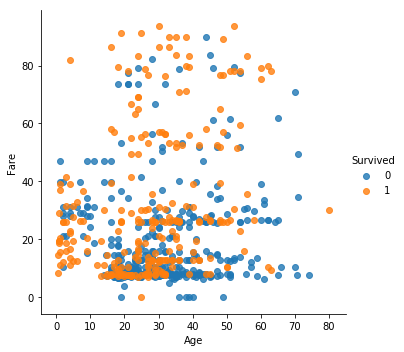

In [22]:
# 아웃라이어가 존재하므로 범위를 줄여서 탐색
low_fare = train[train["Fare"]<100]

sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

#### 나이가 어리고 지불요금이 높으면 생존률 높음

## Processing 처리

### 1. Encode Sex 성별 인코드

In [23]:
# object 데이터의 변환, 남성을 '0', 여성을 '1' 로 표현
train["Sex_encode"]=train["Sex"].replace("male",0).replace("female",1)
train[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [24]:
# test 데이터도 수정
test["Sex_encode"]=test["Sex"].replace("male",0).replace("female",1)
test[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1


### 2. Fill in missing Fare 요금 비어있는 값을 0으로 바꿈

In [25]:
# NaN 값을 0으로 바꿈
train["Fare"]=train["Fare"].fillna(0)

train[train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode


In [26]:
test["Fare"]=test["Fare"].fillna(0)

test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode


## Train 학습

Feature(x) - Pclass, Sex, Fare,... = 학습에 필요한 변수

Label(y) - Survived = 학습의 결과

In [27]:
# feature 지정
feature_names=["Pclass", "Sex_encode", "Fare"]
feature_names

['Pclass', 'Sex_encode', 'Fare']

In [28]:
# x라는 변수에 feature 담기
x = train[feature_names]
x.head()

,Pclass,Sex_encode,Fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500


In [30]:
# label 지정
label_names = "Survived"

In [31]:
# y라는 변수에 label 담기
y = train[label_names]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### 1. Use Decision Tree

In [32]:
# Decision Tree 를 불러오기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### fit 으로 train 하고 predict로 test

In [33]:
model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 2. Visualize 시각화

In [34]:
import os

os.environ["PATH"] = os.environ["PATH"] + os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

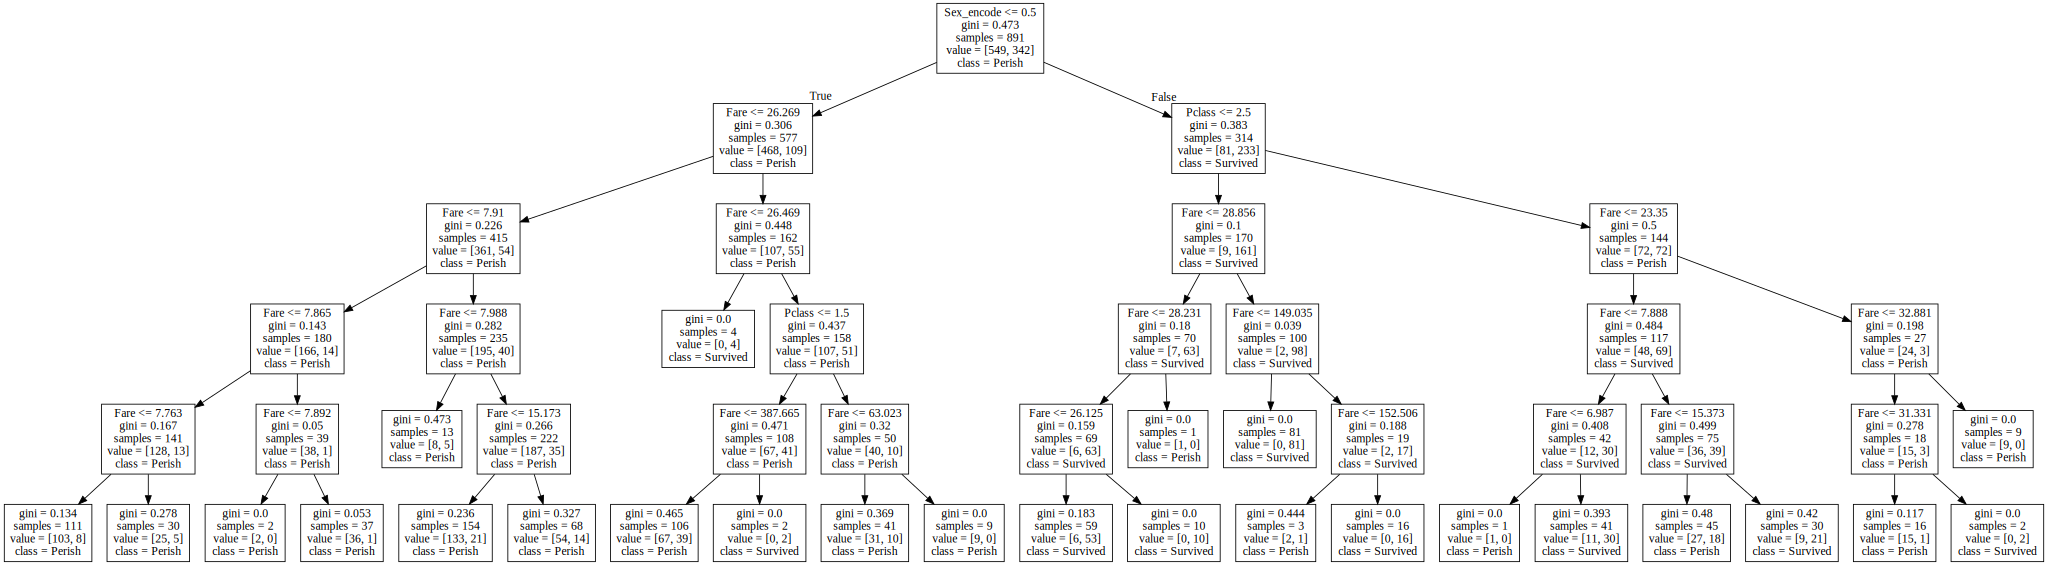

In [35]:
import graphviz

from sklearn.tree import export_graphviz

tree = export_graphviz(model, 
                      feature_names = feature_names,
                      class_names = ["Perish", "Survived"])

graphviz.Source(tree)

### 3. predict 예측

In [38]:
x_test=test[feature_names]

x_test.head()

,Pclass,Sex_encode,Fare
0,3,0,7.8292
1,3,1,7.0000
2,2,0,9.6875
3,3,0,8.6625
4,3,1,12.2875


In [39]:
prediction_list=model.predict(x_test)

prediction_list[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

## Submit 제출

In [40]:
submit=pd.read_csv("data/gender_submission.csv")

submit["Survived"] = prediction_list

submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [41]:
submit.to_csv("decision-tree.csv", index = False)